In [ ]:
"""
Insurance Dataset
Load Data and Write script to perform following operations.
1. Consider the above data and perform preprocessing.
2. Perform basic EDA for data analysis.
3. Perform feature engineering to select appropriate features.
4. Construct linear regression model
5. Construct multiple linear regression model
6. Evaluate the model with appropriate metrics
7. Generate the results
"""


1. Consider the above data and perform preprocessing.

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df=pd.read_csv(r'C:\Users\DRG\Downloads\datasets\insurance.csv')

In [59]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [60]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [61]:
df.shape

(1338, 7)

In [62]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [63]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [65]:
c=df.select_dtypes(include=['object']).columns
c

Index(['sex', 'smoker', 'region'], dtype='object')

In [66]:
d=pd.get_dummies(df,columns=['sex','smoker','region'],drop_first=True)
d.head()

age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False

In [67]:
for i in d.select_dtypes(include=["bool"]):
    d[i]=d[i].astype(int)
d.tail()

age    bmi  children     charges  sex_male  smoker_yes  \
1333   50  30.97         3  10600.5483         1           0   
1334   18  31.92         0   2205.9808         0           0   
1335   18  36.85         0   1629.8335         0           0   
1336   21  25.80         0   2007.9450         0           0   
1337   61  29.07         0  29141.3603         0           1   

      region_northwest  region_southeast  region_southwest  
1333                 1                 0                 0  
1334                 0                 0                 0  
1335                 0                 1                 0  
1336                 0                 0                 1  
1337                 1                 0                 0

2. Perform basic EDA for data analysis.

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

"""See the summary Statistic
-used to understand the data before building the model"""
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

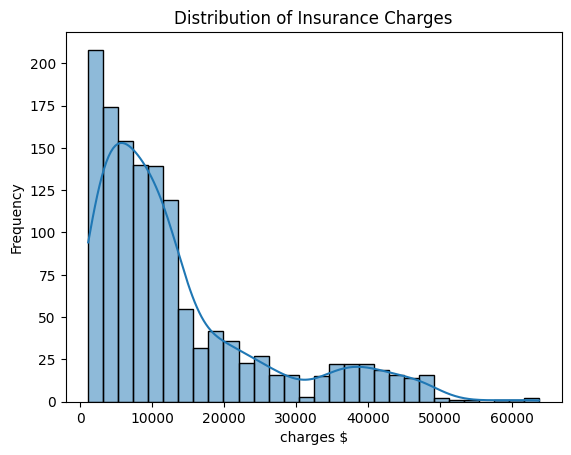

In [83]:
"""Visualize the Target Variables
this tells us if the charges normally distributed or skewed
"""

sns.histplot(df['charges'],kde=True,bins=30)  # kde used to draw smooth curve above bars of hist 
plt.title("Distribution of Insurance Charges")
plt.xlabel("charges $")
plt.ylabel("Frequency")
"""we see a long tail to the right, it’s right-skewed (meaning some people pay very high insurance amounts).
It will likely be skewed because some people (smokers, older people) have very high charge"""
plt.show()



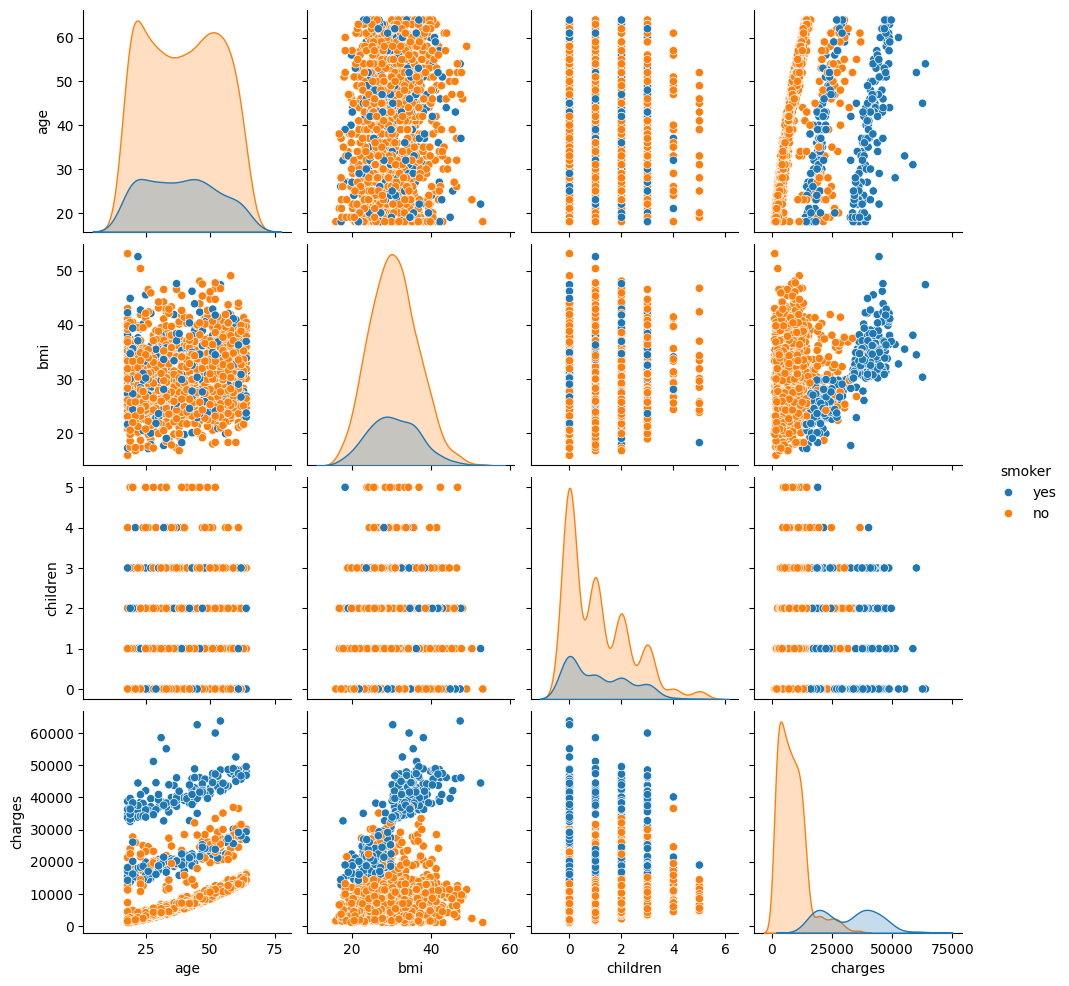

In [70]:
sns.pairplot(df,hue='smoker')
plt.show()

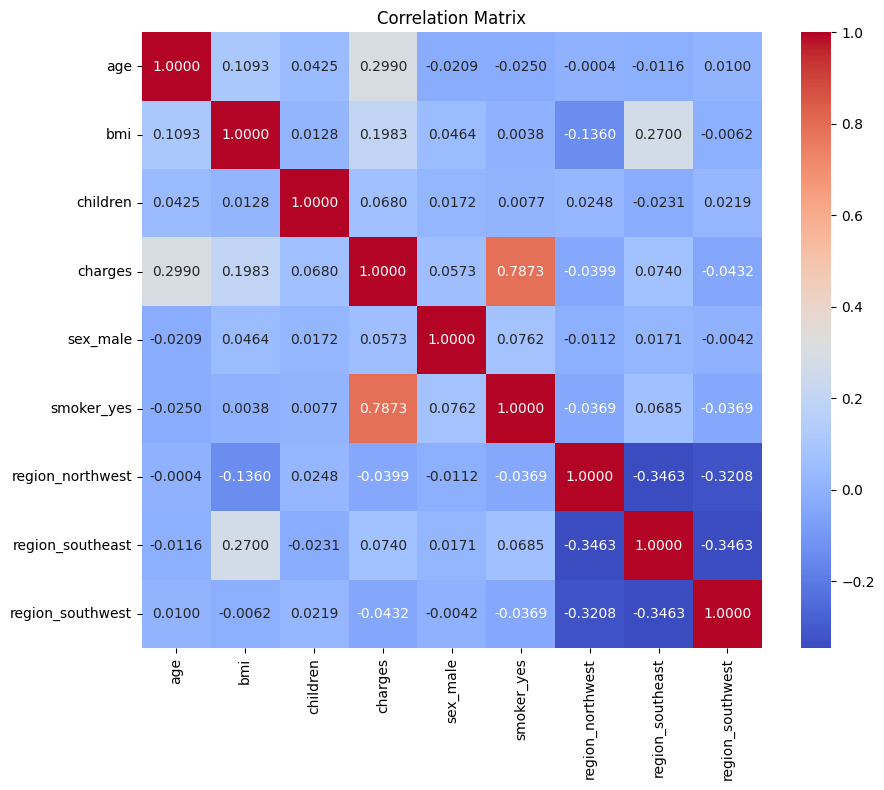

In [71]:
""" Check Correlation -it tells us which features affect charges the most"""
corr=d.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.4f')
plt.title('Correlation Matrix')
""" insightssmoker will have a very high correlation with charges 
because smoking increases health risks.age, BMI, and children will also affect charges but to a lesser extent.
"""
plt.show()


3. Perform feature engineering to select appropriate features.

In [72]:
"""we select important columns for prediction.
Separating independent variables (X) and the target variable (y).
Standardizing numerical features."""
X= d.drop(columns=['charges'])  # Everything except the target X
y= d['charges']  # This is what we want to predict Y

In [73]:
#here , we are going to print feature{Everything except the target X}
x

age     bmi  children  sex_male  smoker_yes  region_northwest  \
0      19  27.900         0         0           1                 0   
1      18  33.770         1         1           0                 0   
2      28  33.000         3         1           0                 0   
3      33  22.705         0         1           0                 1   
4      32  28.880         0         1           0                 1   
...   ...     ...       ...       ...         ...               ...   
1333   50  30.970         3         1           0                 1   
1334   18  31.920         0         0           0                 0   
1335   18  36.850         0         0           0                 0   
1336   21  25.800         0         0           0                 0   
1337   61  29.070         0         0           1                 1   

      region_southeast  region_southwest  
0                    0                 1  
1                    1                 0  
2                    1                 0  
3                    0                 0  
4                    0                 0  
...                ...               ...  
1333                 0                 0  
1334                 0                 0  
1335                 1                 0  
1336                 0                 1  
1337                 0                 0  

[1338 rows x 8 columns]

In [74]:
y #here we are going to print target

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

 Split the Dataset into Training and Testing Sets
Before training any machine learning model, we divide the dataset into a training set and a testing set. This helps us evaluate the model's performance on unseen data.

Training Set (80%) → Used to train the model.
Testing Set (20%) → Used to test the model's performance.

test_size=0.2 → Specifies that 20% of the data will be used for testing.
random_state=42 → Ensures consistent results every time you run the script.

X_train, X_test → Contains the input features for training and testing.
y_train, y_test → Contains the target values (charges) for training and testing.

In [91]:
#split the data into training and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
"""Why Do We Split the Data?
1)To avoid overfitting-If we train on all data, the model may memorize it instead of learning patterns.
2)To measure real-world performance-The test set mimics new, unseen data, so we get a better idea of how the model will perform in real life."""

'Why Do We Split the Data?\n1)To avoid overfitting-If we train on all data, the model may memorize it instead of learning patterns.\n2)To measure real-world performance-The test set mimics new, unseen data, so we get a better idea of how the model will perform in real life.'

4. Construct linear regression model

In [92]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)  # Train the model
"""This command trains the model using the training dataset (X_train, y_train).
The model learns the relationship between input features (X_train) and output (y_train)."""
# Make Predictions and Evaluate the Model--Once trained, the model is tested on unseen data (test set).

y_pred = linear_regressor.predict(X_test)  # Predict charges for test data

In [93]:
#y_pred

In [94]:
# #Understanding the Model Output:
# print("\nLinear Regression Model Performance:\n ")
# print(f'Intercept: {linear_regressor.intercept_}')
# print(f'Coefficients: {linear_regressor.coef_}')
# #The coefficients tell us how each feature(age,BMI,smoker)affects charges.

5. Construct multiple linear regression model

In [95]:
#Actually, our previous linear regression model already supports multiple features (age, BMI, smoker, etc.), so we don’t need to make a separate model.


6. Evaluate the model with appropriate metrics

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
mse=mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("mse",mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')


mse 33596915.85136146
Root Mean Squared Error (RMSE): 5796.2846592762735
Mean Absolute Error (MAE): 4181.194473753654
R² Score: 0.7835929767120723


In [97]:
"""RMSE = Lower is better.
MAE=Measures average error, lower is better.
R² Score = Closer to 1 is better(tells how much variance the model 
explains)."""


'RMSE = Lower is better.\nMAE=Measures average error, lower is better.\nR² Score = Closer to 1 is better(tells how much variance the model \nexplains).'

7. Generate the results

In [98]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

           Actual     Predicted
764    9095.06825   8969.550274
887    5272.17580   7068.747443
890   29330.98315  36858.410912
1293   9301.89355   9454.678501
259   33750.29180  26973.173457
